In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../")))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import time

from models import FFNN

%load_ext autoreload
%autoreload 2

In [3]:
print("Downloading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')
X = X.astype(float)
y = y.astype(int)

In [4]:
X = np.array(X)
y = np.array(y)

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_one_hot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = encoder.transform(y_test.reshape(-1, 1))

input_size = 784  # images 28x28 = 784 pixels
hidden_sizes = [64] 
output_size = 10  


FFNN Tanpa Regularisasi...
Epoch 1/10, Train Loss: 0.6779
Epoch 2/10, Train Loss: 0.3410
Epoch 3/10, Train Loss: 0.2925
Epoch 4/10, Train Loss: 0.2644
Epoch 5/10, Train Loss: 0.2431
Epoch 6/10, Train Loss: 0.2266
Epoch 7/10, Train Loss: 0.2118
Epoch 8/10, Train Loss: 0.1998
Epoch 9/10, Train Loss: 0.1888
Epoch 10/10, Train Loss: 0.1793
Custom FFNN training time: 26.21 seconds
Tanpa Regularisasi: 0.9455


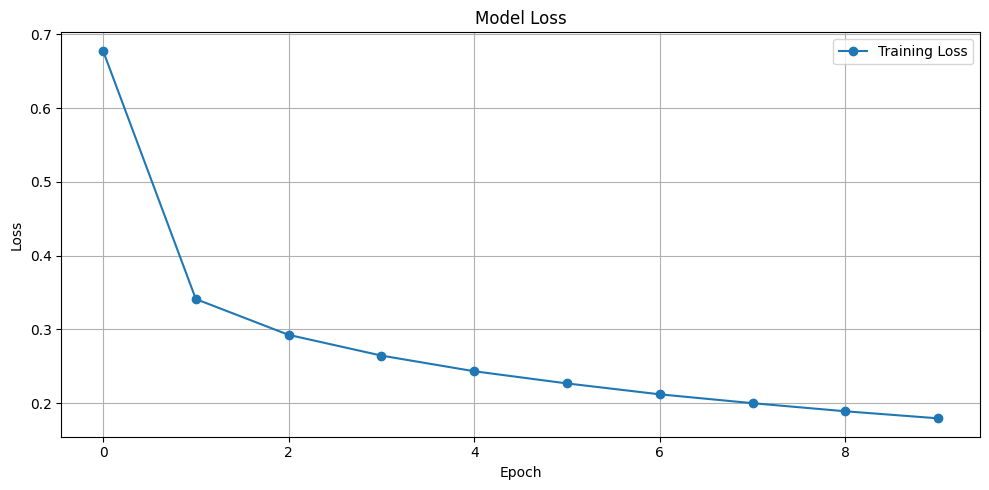

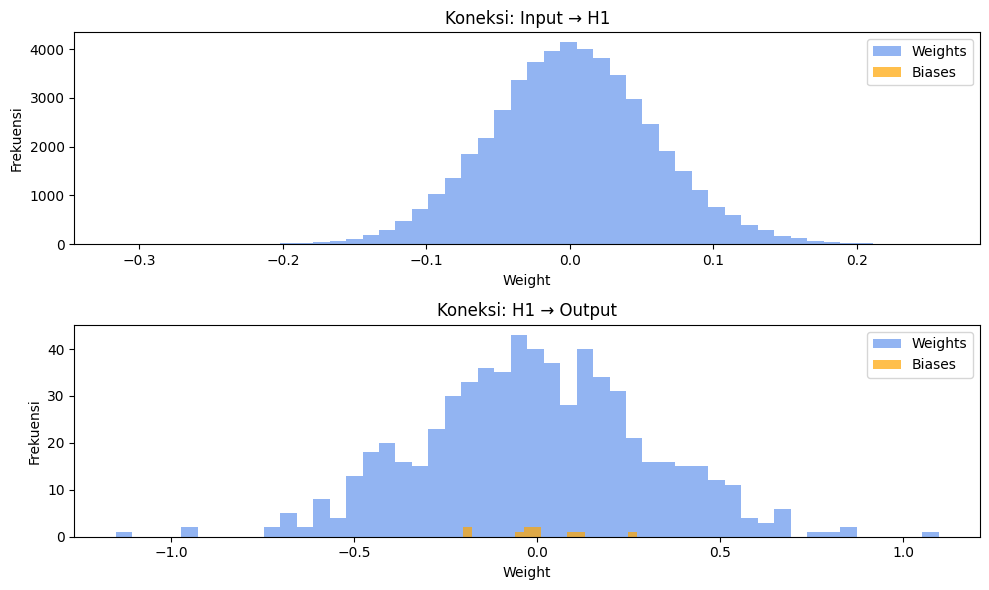

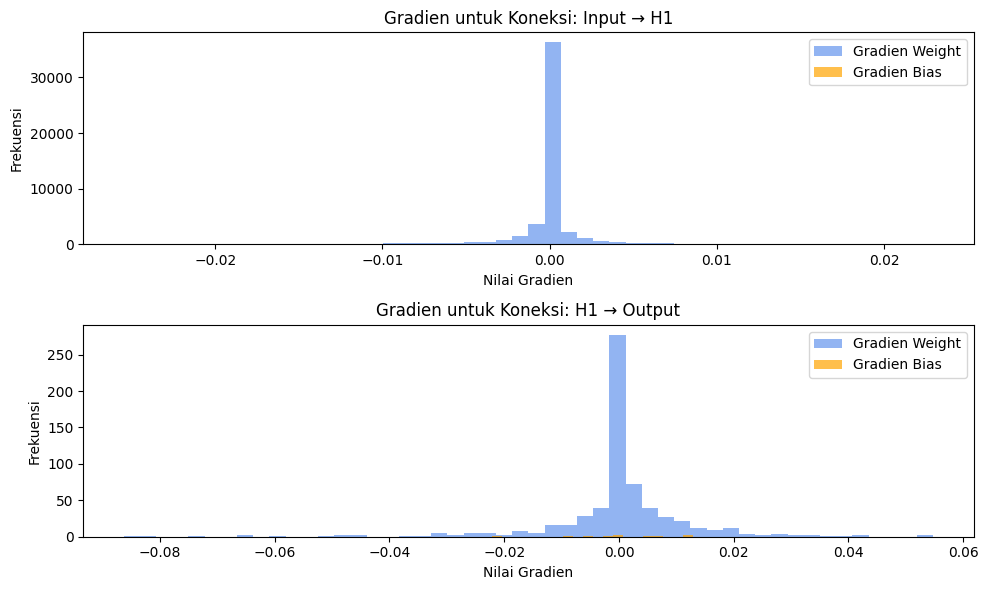

In [5]:
# Model FFNN tanpa regularisasi
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['relu'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he',
    use_rmsnorm=False,
)

# Training
print("\nFFNN Tanpa Regularisasi...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

# Prediksi
ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Tanpa Regularisasi: " + str(ffnn_accuracy))

# Visualisasi
ffnn_model.plot_loss(history=ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()


FFNN dengan Regularisasi L1...
Epoch 1/10, Train Loss: 6.0830
Epoch 2/10, Train Loss: 1.9212
Epoch 3/10, Train Loss: 1.6946
Epoch 4/10, Train Loss: 1.6148
Epoch 5/10, Train Loss: 1.5762
Epoch 6/10, Train Loss: 1.5472
Epoch 7/10, Train Loss: 1.5211
Epoch 8/10, Train Loss: 1.4988
Epoch 9/10, Train Loss: 1.4799
Epoch 10/10, Train Loss: 1.4646
Custom FFNN training time: 47.88 seconds
Tanpa Regularisasi: 0.8390714285714286


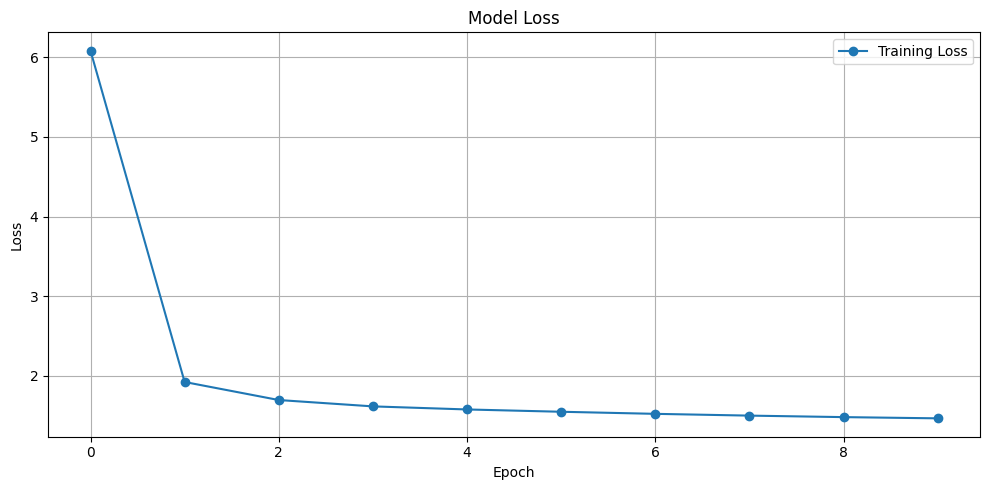

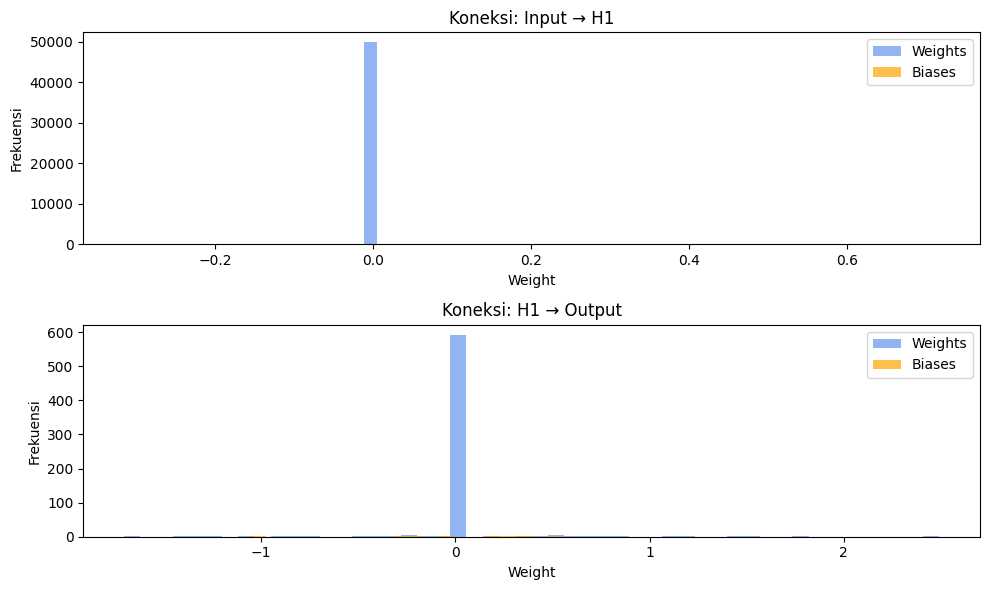

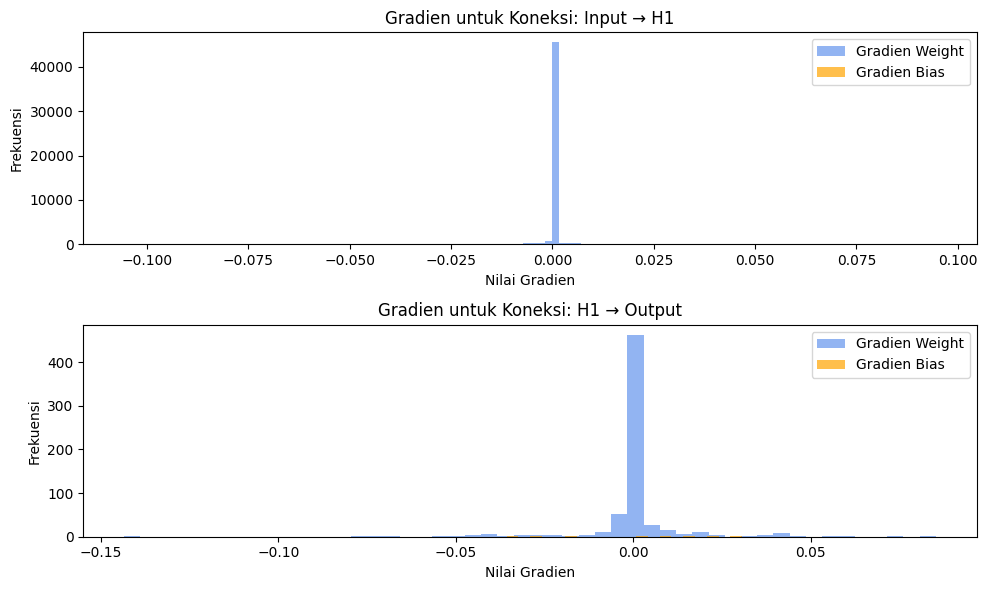

In [6]:
# Model FFNN dengan regularisasi L1
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['relu'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he',
    use_rmsnorm=False,
)

# Training
print("\nFFNN dengan Regularisasi L1...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1,
    reg_type='l1',
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

# Prediksi
ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Tanpa Regularisasi: " + str(ffnn_accuracy))

# Visualisasi
ffnn_model.plot_loss(history=ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()


FFNN dengan Regularisasi L2...
Epoch 1/10, Train Loss: 1.3669
Epoch 2/10, Train Loss: 0.9566
Epoch 3/10, Train Loss: 0.8200
Epoch 4/10, Train Loss: 0.7300
Epoch 5/10, Train Loss: 0.6678
Epoch 6/10, Train Loss: 0.6244
Epoch 7/10, Train Loss: 0.5932
Epoch 8/10, Train Loss: 0.5712
Epoch 9/10, Train Loss: 0.5554
Epoch 10/10, Train Loss: 0.5437
Custom FFNN training time: 34.21 seconds
Tanpa Regularisasi: 0.9244285714285714


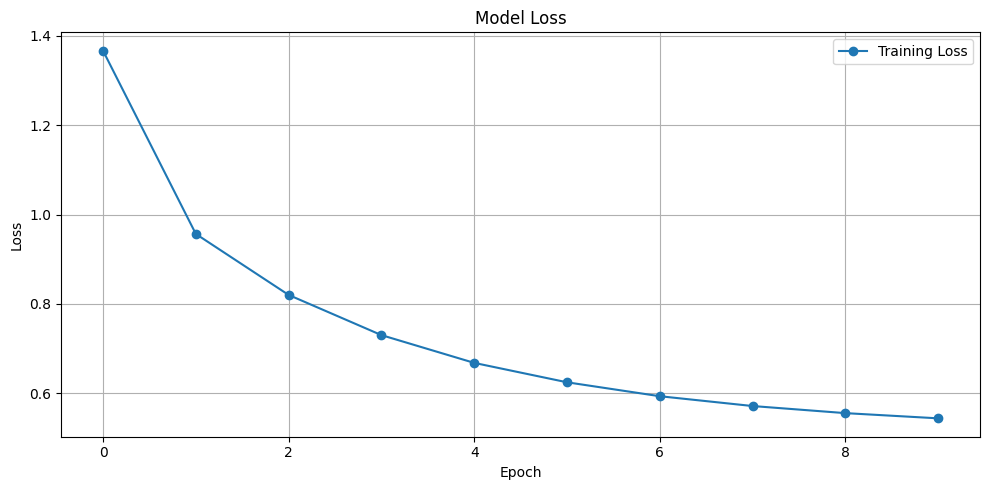

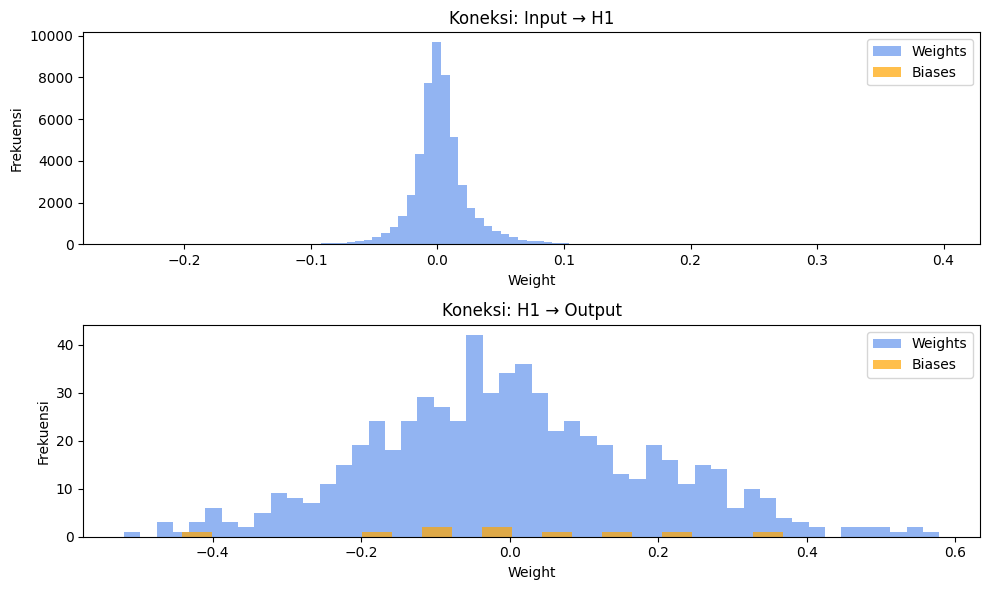

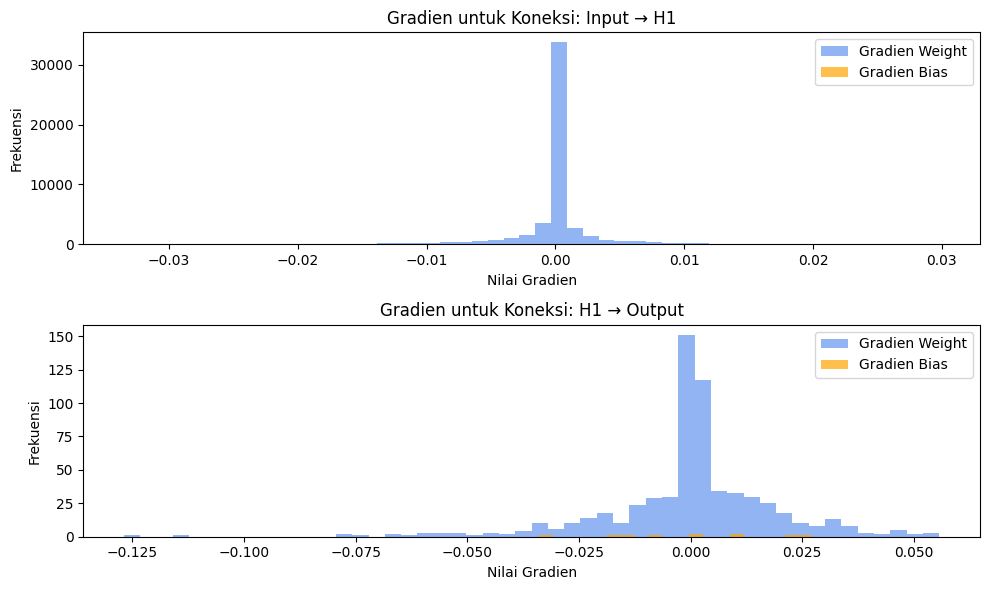

In [7]:
# Model FFNN dengan regularisasi L2
ffnn_model = FFNN(
    layer_sizes=[input_size] + hidden_sizes + [output_size],
    activations=['relu'] * len(hidden_sizes) + ['softmax'],
    loss='categorical_cross_entropy',
    weight_init='he',
    use_rmsnorm=False,
)

# Training
print("\nFFNN dengan Regularisasi L2...")
start_time = time.time()
ffnn_history = ffnn_model.train(
    X_train, y_train_one_hot,
    batch_size=32,
    learning_rate=0.01,
    epochs=10,
    verbose=1,
    reg_type='l2',
)
ffnn_training_time = time.time() - start_time
print(f"Custom FFNN training time: {ffnn_training_time:.2f} seconds")

# Prediksi
ffnn_predictions = ffnn_model.predict(X_test)
ffnn_pred_classes = np.argmax(ffnn_predictions, axis=1)
ffnn_accuracy = accuracy_score(y_test, ffnn_pred_classes)
print("Tanpa Regularisasi: " + str(ffnn_accuracy))

# Visualisasi
ffnn_model.plot_loss(history=ffnn_history)
ffnn_model.plot_weight_distribution()
ffnn_model.plot_gradient_distribution()